<a href="https://colab.research.google.com/github/fullstackDonya/planet-classification/blob/main/terre_soleil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

def get_distance_data(start_date, end_date):
    url = (
        "https://ssd.jpl.nasa.gov/api/horizons.api?"
        "format=text&COMMAND='399'&CENTER='@10'"
        f"&START_TIME='{start_date}'&STOP_TIME='{end_date}'&STEP_SIZE='1d'"
        "&QUANTITIES='20'"
    )

    response = requests.get(url)
    if response.status_code == 200:
        text = response.text
        # On extrait uniquement la partie des données entre les balises $$SOE et $$EOE
        data_start = text.find("$$SOE") + len("$$SOE\n")
        data_end = text.find("$$EOE")
        data_cleaned = text[data_start:data_end].strip()

        # Chaque ligne contient : date, distance (AU), etc. On garde la date et la distance
        # Exemple d'une ligne : "2020-Jan-01 00:00   0.983298665911"
        lines = data_cleaned.split("\n")
        rows = []
        for line in lines:
            parts = line.strip().split()
            date_str = f"{parts[0]} {parts[1]}"
            distance_au = float(parts[-1])  # En unité astronomique
            distance_km = distance_au * 149_597_870.7  # conversion AU -> km
            rows.append([date_str, distance_km])

        df = pd.DataFrame(rows, columns=["Date", "Distance_km"])
        df["Date"] = pd.to_datetime(df["Date"])
        return df
    else:
        print("Erreur dans la requête API")
        return None


# Obtenir les distances de 1900 à 2024
df_distance = get_distance_data("1900-01-01", "2024-12-31")

# Affichage des 5 premières lignes pour vérifier
print(df_distance.head())

        Date   Distance_km
0 1900-01-01 -1.185264e+06
1 1900-01-02 -2.541369e+05
2 1900-01-03  6.803262e+05
3 1900-01-04  1.644529e+06
4 1900-01-05  2.662603e+06


        Date   Distance_km
0 1900-01-01 -1.185264e+06
1 1900-01-02 -2.541369e+05
2 1900-01-03  6.803262e+05
3 1900-01-04  1.644529e+06
4 1900-01-05  2.662603e+06


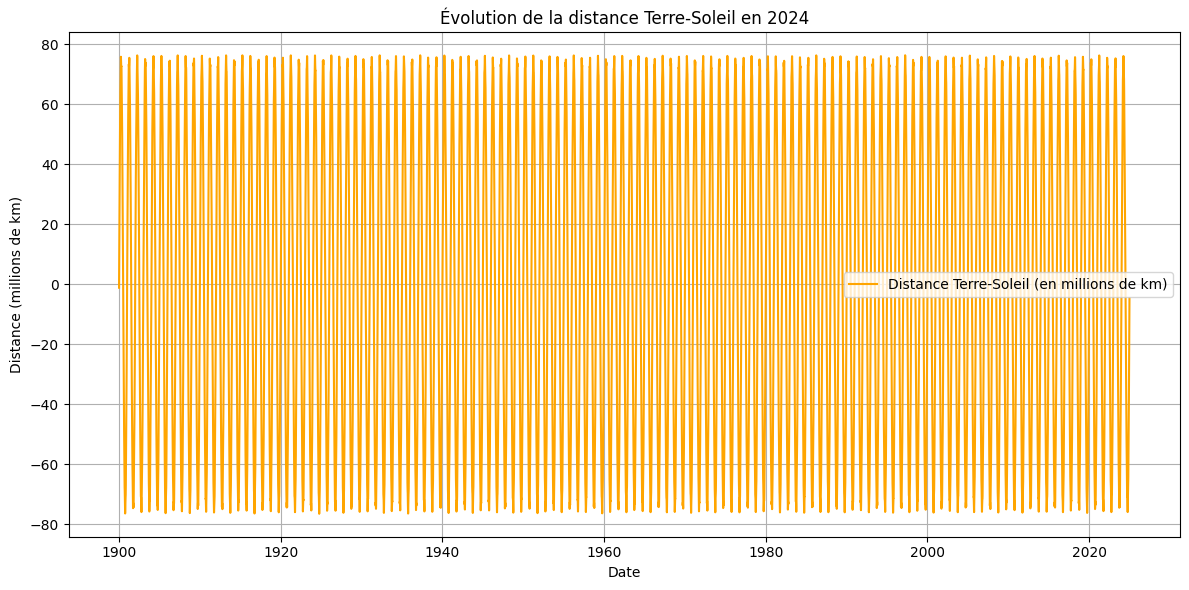

In [33]:

# Vérification
print(df_distance.head())

# Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(df_distance["Date"], df_distance["Distance_km"] / 1e6, label="Distance Terre-Soleil (en millions de km)", color="orange")
plt.xlabel("Date")
plt.ylabel("Distance (millions de km)")
plt.title("Évolution de la distance Terre-Soleil en 2024")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


🌡️ Température moyenne estimée (modèle en équilibre radiatif)
La température moyenne de la Terre
𝑇
T (en Kelvin) peut être estimée par :

𝑇
=
(
(
1
−
𝐴
)
⋅
𝑆
4
⋅
𝜎
⋅
𝐷
2
)
1
/
4
T=(
4⋅σ⋅D
2

(1−A)⋅S
​
 )
1/4

Où :

𝐴
A = albédo terrestre moyen ≈ 0.3

𝑆
S = constante solaire ≈ 1361 W/m² (puissance reçue à 1 UA)

𝜎
σ = constante de Stefan-Boltzmann ≈ 5.67 × 10⁻⁸ W·m⁻²·K⁻⁴

𝐷
D = distance Terre-Soleil en UA

Cette formule suppose que la Terre est une sphère noire recevant le rayonnement solaire, sans atmosphère (≈ 255 K). Avec l’effet de serre, la température réelle moyenne est ≈ 288 K.

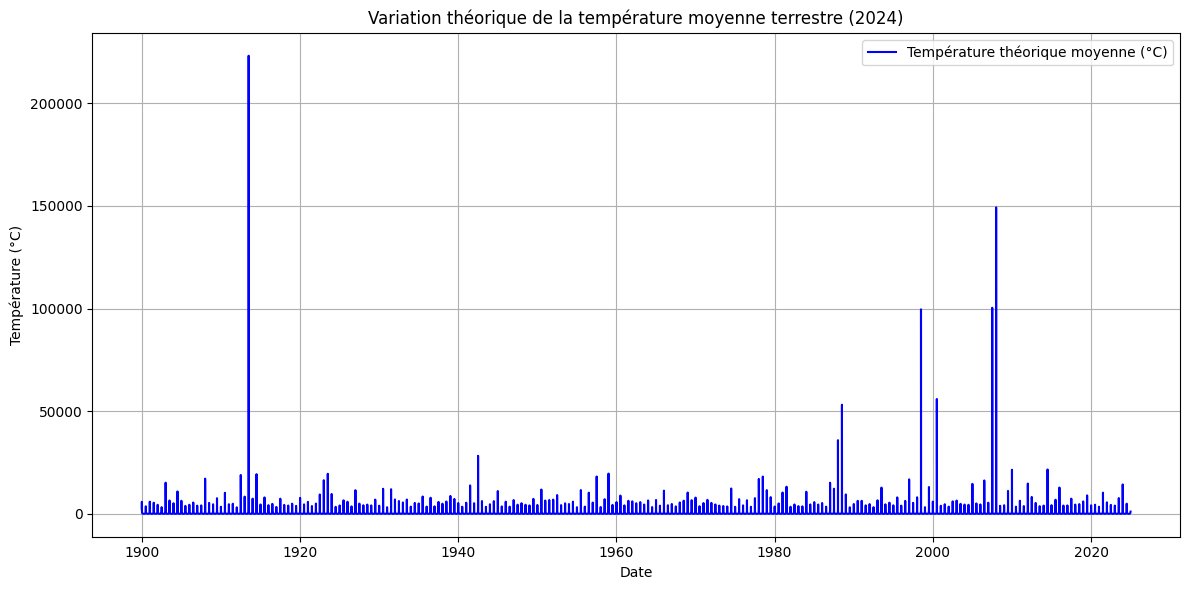

In [34]:
import numpy as np

def compute_temperature(distance_au, albedo=0.3, solar_constant=1361, sigma=5.67e-8):
    # D en unités astronomiques → on ramène à 1 UA
    return ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25

# Ajouter la distance en AU pour la formule
df_distance["Distance_AU"] = df_distance["Distance_km"] / 149_597_870.7
df_distance["Temp_K"] = df_distance["Distance_AU"].apply(compute_temperature)
df_distance["Temp_C"] = df_distance["Temp_K"] - 273.15  # conversion en °C

# Tracer la température
plt.figure(figsize=(12, 6))
plt.plot(df_distance["Date"], df_distance["Temp_C"], color="blue", label="Température théorique moyenne (°C)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.title("Variation théorique de la température moyenne terrestre (2024)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Les principaux facteurs qui influencent la température terrestre comprennent :

L'atmosphère : Elle agit comme un isolant et redistribue la chaleur à l'échelle planétaire. Les gaz à effet de serre (comme le dioxyde de carbone, la vapeur d'eau et le méthane) emprisonnent une partie de l'énergie thermique, réchauffant ainsi la surface de la Terre.

L'effet de serre : Une partie de l'énergie thermique émise par la Terre (après avoir absorbé le rayonnement solaire) est renvoyée vers la surface par l'atmosphère. L'intensité de cet effet dépend de la concentration des gaz à effet de serre.

Les saisons : Elles sont causées par l'inclinaison de l'axe terrestre par rapport au plan de l'orbite. Cela entraîne des variations saisonnières dans la quantité de rayonnement solaire reçue par différentes régions du monde.

Les océans : Les océans jouent un rôle crucial dans la régulation de la température mondiale en raison de leur capacité à stocker et à redistribuer l'énergie thermique (effet modérateur). L'évaporation, la condensation, et les courants marins ont tous une influence sur la température locale et mondiale.

🌡️ Modèle amélioré (approximé)
Le modèle qui inclut ces facteurs pourrait être basé sur une équation de température globale moyenne ajustée en fonction des paramètres environnementaux. Bien qu'il soit impossible de simuler ces facteurs précisément sans un modèle climatique complet (comme ceux utilisés par les agences de prévisions météorologiques), on peut appliquer des approximations pour en tenir compte.

Voici une version simplifiée avec des ajustements pour l'effet de serre, les saisons, et les océans :

1. Effet de serre (effet réaliste)
L'effet de serre peut être ajouté à la formule comme un facteur d'augmentation de température qui dépend de la concentration en gaz à effet de serre (CO₂, H₂O, etc.). Ce facteur peut être estimé en fonction de la distance Terre-Soleil et des gaz à effet de serre moyens.

2. Saisons et Inclinaison axiale
Les saisons sont principalement dues à l'inclinaison de l'axe terrestre (
𝜃
≈
23.5
∘
θ≈23.5
∘
 ). La variation de l'angle d'incidence du rayonnement solaire sur la Terre change en fonction de la latitude et du temps de l'année. On peut ajuster cela en calculant l'angle d'incidence du Soleil selon le jour de l'année et la latitude moyenne.

3. Océans (modération de la température)
L'eau a une capacité thermique élevée, ce qui signifie que les océans peuvent absorber et libérer de l'énergie plus lentement que les terres. Cela a pour effet de modérer les températures, particulièrement sur les continents proches des océans.

🧮 Formule de la température ajustée
En tenant compte de ces effets, on peut proposer une formule simplifiée pour la température
𝑇
globale
T
globale
​
  :

𝑇
globale
=
𝑇
radiative
×
(
1
+
effet de serre
)
×
facteur saisonnier
×
facteur oc
e
ˊ
an
T
globale
​
 =T
radiative
​
 ×(1+effet de serre)×facteur saisonnier×facteur oc
e
ˊ
 an
Où :

𝑇
radiative
T
radiative
​
  est la température calculée à partir du modèle d'équilibre radiatif (comme mentionné précédemment).

Effet de serre : Peut être estimé par un facteur multiplicatif en fonction de la concentration de CO₂. Par exemple, un facteur de
1.2
1.2 pourrait être appliqué pour un effet de serre modéré.

Facteur saisonnier : Calculé en fonction de l'angle d'incidence du Soleil. Plus l'inclinaison axiale est grande pendant l'année, plus la variation de la température sera significative.

Facteur océan : On pourrait estimer un facteur d'atténuation de
0.8
0.8 pour modérer les effets thermiques en raison des océans.



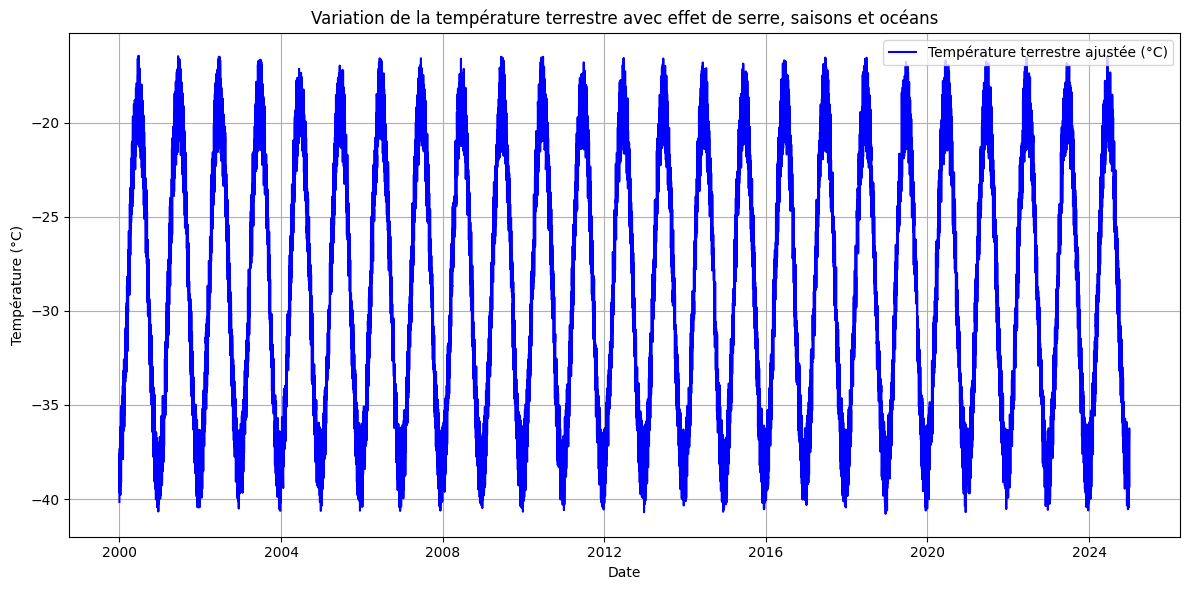

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres constants
albedo = 0.3  # Albédo moyen de la Terre
solar_constant = 1361  # Constante solaire en W/m²
sigma = 5.67e-8  # Constante de Stefan-Boltzmann en W/m²/K⁴
eccentricity = 0.0167  # Excentricité orbitale de la Terre (valeur moyenne)

# Fonction pour calculer la température radiative
def compute_radiative_temperature(distance_au):
    return ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25

# Fonction pour appliquer l'effet de serre
def apply_greenhouse_effect(temp_radiative, co2_factor=1.2):
    return temp_radiative * co2_factor

# Fonction pour calculer le facteur saisonnier (variation de l'inclinaison de l'axe terrestre)
def seasonal_factor(day_of_year):
    # Calcul de l'angle d'incidence du Soleil en fonction du jour de l'année (simplifié)
    angle_of_inclination = 23.5 * np.sin(np.deg2rad((360 / 365.25) * (day_of_year - 81)))  # Variation annuelle
    return 1 + 0.1 * np.sin(np.deg2rad(angle_of_inclination))  # Facteur saisonnier simplifié

# Fonction pour appliquer l'effet des océans (modération thermique)
def ocean_factor(latitude):
    return 0.8  # Supposition d'une atténuation uniforme des températures due aux océans

# Ajouter ces facteurs à un DataFrame avec des dates
dates = pd.date_range("2000-01-01", "2025-01-01", freq="D")  # Plage de dates
distance_terre_soleil = np.random.uniform(0.98, 1.02, size=len(dates))  # Exemple de distances Terre-Soleil en AU
co2_factor = 1.2  # Facteur d'effet de serre hypothétique
latitude = 0  # Latitude moyenne (équateur)

# Calcul des températures ajustées
temps_radiative = np.array([compute_radiative_temperature(d) for d in distance_terre_soleil])
temps_with_greenhouse = np.array([apply_greenhouse_effect(t, co2_factor) for t in temps_radiative])
seasonal_adjustment = np.array([seasonal_factor(day) for day in range(1, len(dates) + 1)])
ocean_adjustment = np.array([ocean_factor(lat) for lat in [latitude] * len(dates)])

temps_adjusted = temps_with_greenhouse * seasonal_adjustment * ocean_adjustment

# Convertir les températures en Celsius
temps_celsius = temps_adjusted - 273.15

# Affichage
plt.figure(figsize=(12, 6))
plt.plot(dates, temps_celsius, label="Température terrestre ajustée (°C)", color="blue")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.title("Variation de la température terrestre avec effet de serre, saisons et océans")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Pour calculer la distance moyenne du Soleil à la Terre au cours de l'année, ainsi que la température moyenne de la Terre en fonction des mois de l'année, nous devons intégrer à la fois la variation de la distance (qui est fonction de la position de la Terre dans son orbite elliptique) et la température globale de la Terre qui en découle.

1. Calcul de la distance moyenne du Soleil à la Terre
La distance moyenne de la Terre au Soleil varie au cours de l'année en raison de l'excentricité de l'orbite terrestre. Une approximation classique de la variation de cette distance, en fonction du temps, est donnée par l'excentricité de l'orbite terrestre et la loi des aires de Kepler.

Distance moyenne (en Astronomical Unit - AU)
L'excentricité de l'orbite de la Terre est d'environ
𝑒
=
0.0167
e=0.0167, et la distance moyenne de la Terre au Soleil est de 1 AU (150 millions de km). La distance réelle varie autour de cette valeur tout au long de l'année.

On peut modéliser la distance
𝐷
D de la Terre au Soleil par une fonction qui dépend du temps, et qui prend en compte la variation de la distance au cours de l'année due à l'orbite elliptique.

𝐷
(
𝑡
)
=
1

AU
1
+
𝑒
cos
⁡
(
𝜃
)
D(t)=
1+ecos(θ)
1AU
​

Où :

𝜃
θ est l'angle de la Terre par rapport au Soleil, qui change au cours de l'année.

𝑒
e est l'excentricité de l'orbite terrestre.

2. Calcul de la température en fonction de la distance
La température de la Terre dépend de la quantité d'énergie reçue du Soleil, qui est inversement proportionnelle au carré de la distance au Soleil. Nous pouvons utiliser la loi de Stefan-Boltzmann pour ajuster la température :

𝑇
radiative
=
(
(
1
−
𝐴
)
𝑆
4
𝜎
𝐷
2
)
1
/
4
T
radiative
​
 =(
4σD
2

(1−A)S
​
 )
1/4

Où :

𝐴
A est l'albédo de la Terre (environ 0.3),

𝑆
S est la constante solaire (
𝑆
=
1361

W/m
2
S=1361W/m
2
 ),

𝜎
σ est la constante de Stefan-Boltzmann (
𝜎
=
5.67
×
10
−
8

W/m
2
K
4
σ=5.67×10
−8
 W/m
2
 K
4
 ),

𝐷
D est la distance de la Terre au Soleil (en AU, à convertir en mètres pour calculer la température),

𝑇
radiative
T
radiative
​
  est la température de la Terre résultant de l'équilibre radiatif.

observe_temperature(start_year, end_year) :

Cette fonction prend en entrée la plage d'années (par exemple, de 2020 à 2024).

Elle calcule la température moyenne de la Terre pour chaque mois sur toute la période, en itérant sur chaque année.

Elle stocke les températures pour chaque mois (janvier, février, etc.) dans un dictionnaire, puis calcule la température moyenne pour chaque mois sur l'ensemble des années spécifiées.

Calcul de la température moyenne pour chaque mois :

Pour chaque année, nous calculons la température pour chaque mois, puis nous calculons la moyenne de ces températures pour chaque mois sur l'ensemble de la période.

Affichage des résultats :

Le DataFrame résultant affiche la température moyenne pour chaque mois de la période donnée.

Un graphique est également généré pour visualiser la température moyenne de la Terre sur les mois de l'année.

Résultat attendu :
En exécutant ce code, tu obtiendras un tableau avec la température moyenne pour chaque mois sur la période de 2020 à 2024, ainsi qu'un graphique représentant cette variation. Cela permettra d'observer les tendances climatiques basées sur la distance Terre-Soleil pour plusieurs années.


                 Jan        Feb        Mar        Apr        May        Jun  \
1970-2024 -16.530062 -16.511548 -16.530062 -16.520503 -16.530062 -16.520503   

                 Jul        Aug        Sep        Oct        Nov        Dec  
1970-2024 -16.530062 -16.530062 -16.520503 -16.530062 -16.520503 -16.530062  


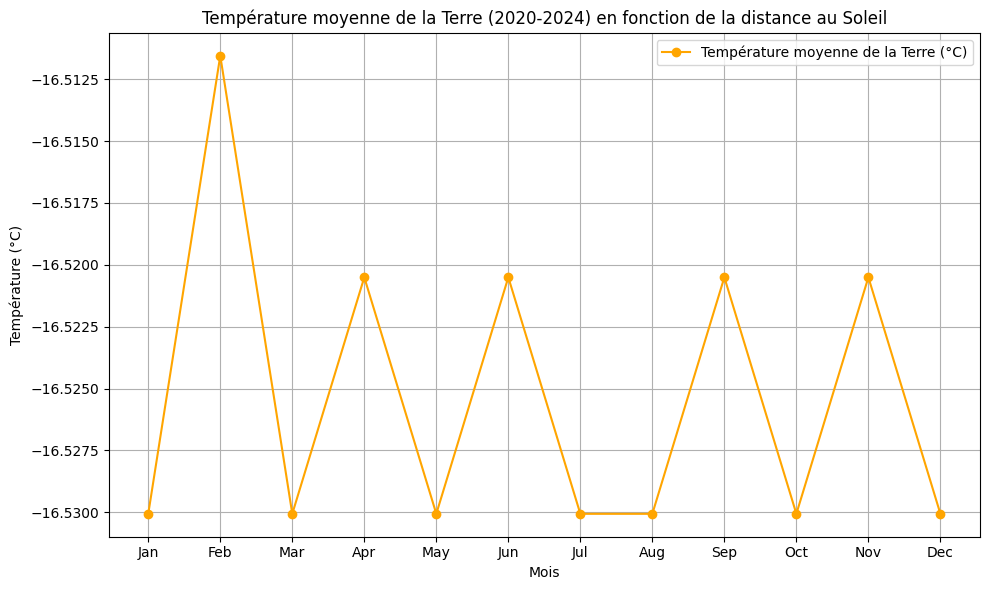

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constantes
albedo = 0.3  # Albédo moyen de la Terre
solar_constant = 1361  # Constante solaire en W/m²
sigma = 5.67e-8  # Constante de Stefan-Boltzmann en W/m²/K⁴
eccentricity = 0.0167  # Excentricité de l'orbite terrestre

# Fonction pour calculer la distance de la Terre au Soleil en fonction du jour de l'année
def calculate_distance(day_of_year):
    # Angle de la Terre par rapport au Soleil, en radians (en utilisant la loi de Kepler approximée)
    theta = 2 * np.pi * (day_of_year / 365.25)
    # Calcul de la distance en AU (Astronomical Unit)
    distance_au = 1 / (1 + eccentricity * np.cos(theta))
    return distance_au

# Fonction pour calculer la température radiative de la Terre en fonction de la distance
def calculate_temperature(distance_au):
    # Calcul de la température en Kelvin, puis conversion en Celsius
    temp_kelvin = ((1 - albedo) * solar_constant / (4 * sigma * (distance_au ** 2))) ** 0.25
    return temp_kelvin - 273.15  # Convertir en Celsius

# Fonction pour observer la température sur plusieurs années
def observe_temperature(start_year, end_year):
    # Liste des mois de l'année
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]  # Nombre de jours par mois

    # Initialisation d'un tableau pour stocker les températures moyennes
    monthly_temperatures = {month: [] for month in months}

    # Itérer sur chaque année dans la plage spécifiée
    for year in range(start_year, end_year + 1):
        for i, days in enumerate(days_in_month):
            avg_day_of_month = (sum(range(1, days + 1)) // days)  # Jour moyen du mois
            distance = calculate_distance(avg_day_of_month)  # Distance du Soleil
            temperature = calculate_temperature(distance)  # Température associée
            monthly_temperatures[months[i]].append(temperature)

    # Calcul de la température moyenne pour chaque mois sur toute la période
    avg_monthly_temperatures = {month: np.mean(temps) for month, temps in monthly_temperatures.items()}

    # Retourner les résultats sous forme de DataFrame pour une meilleure lisibilité
    return pd.DataFrame(avg_monthly_temperatures, index=[f'{start_year}-{end_year}'])

# Obtenir les températures moyennes sur ... ans, de .. à 2024
temperature_data = observe_temperature(1970, 2024)
print(temperature_data)

# Plot des températures moyennes
plt.figure(figsize=(10, 6))
plt.plot(temperature_data.columns, temperature_data.iloc[0], marker='o', color='orange', label="Température moyenne de la Terre (°C)")
plt.xlabel("Mois")
plt.ylabel("Température (°C)")
plt.title("Température moyenne de la Terre (1970-2024) en fonction de la distance au Soleil")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


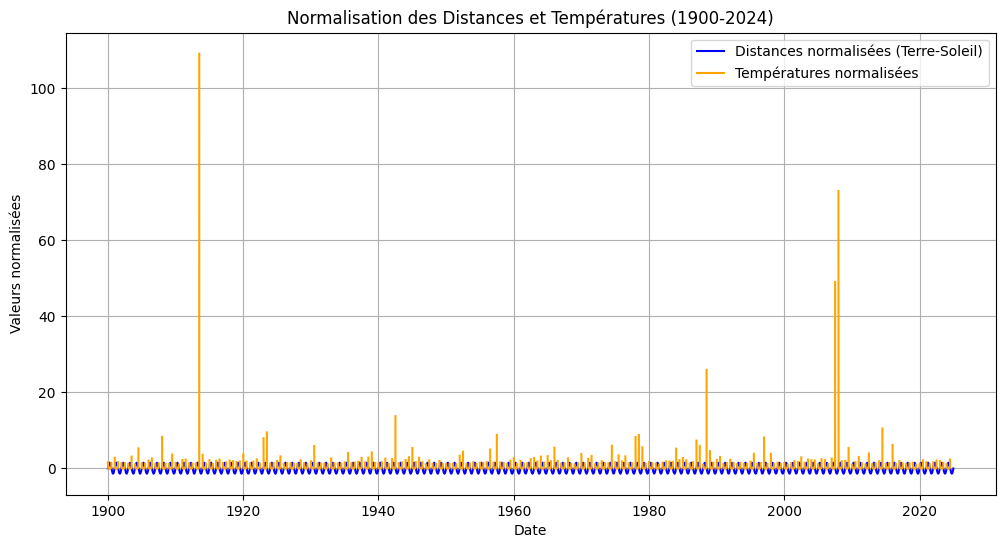

In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Calcul des températures approximatives pour chaque jour en fonction de la distance
# Températures approximées en utilisant une relation simplifiée
temperatures = 255 / (df_distance["Distance_km"] / 149_597_870.7) ** 0.5  # Température approximative en K

# Application du StandardScaler
scaler = StandardScaler()

# Transformation des données
distances_scaled = scaler.fit_transform(pd.DataFrame(df_distance["Distance_km"]))
temperatures_scaled = scaler.fit_transform(pd.DataFrame(temperatures))

# Affichage des données normalisées
plt.figure(figsize=(12, 6))

# Tracer les courbes normalisées
plt.plot(df_distance["Date"], distances_scaled, label="Distances normalisées (Terre-Soleil)", color="blue")
plt.plot(df_distance["Date"], temperatures_scaled, label="Températures normalisées", color="orange")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Valeurs normalisées")
plt.title("Normalisation des Distances et Températures (1900-2024)")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

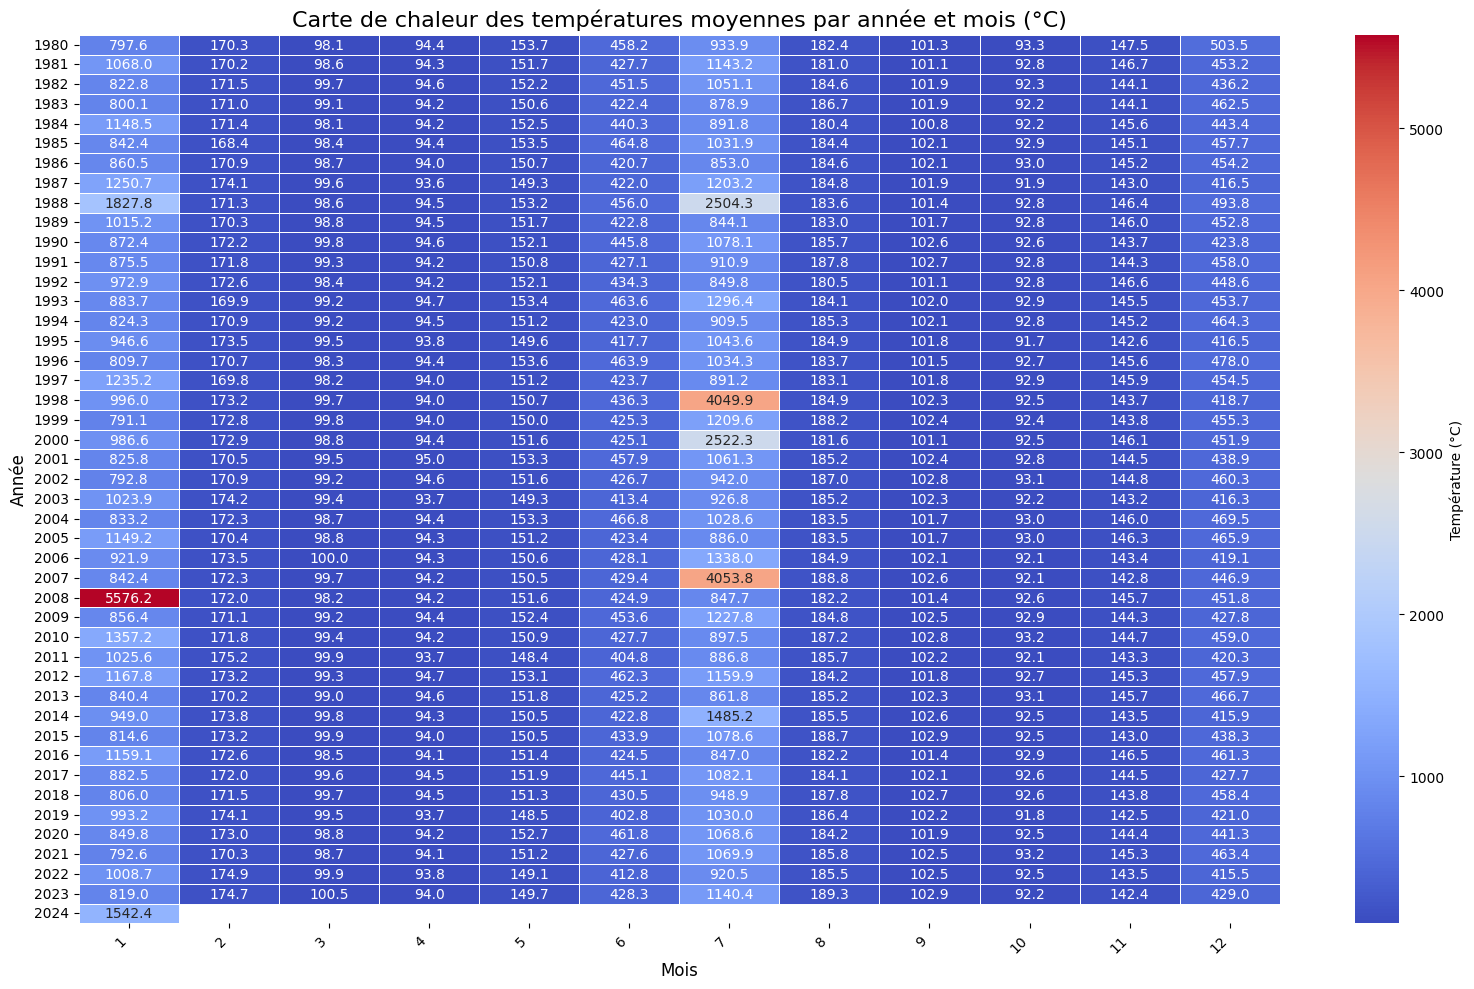

In [46]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


dff_distance = get_distance_data("1980-01-01", "2024-01-01")

# Recalculate temperatures using dff_distance
dff_distance["Distance_AU"] = dff_distance["Distance_km"] / 149_597_870.7
dff_distance["Temperature_K"] = dff_distance["Distance_AU"].apply(compute_temperature)

# Convert temperatures to degrees Celsius
dff_distance["Temperature_C"] = dff_distance["Temperature_K"] - 273.15

# Extract year and month
dff_distance["Year"] = dff_distance["Date"].dt.year
dff_distance["Month"] = dff_distance["Date"].dt.month

# Calculate average temperatures in Celsius by year and month
heatmap_data = dff_distance.groupby(["Year", "Month"])["Temperature_C"].mean().unstack()

# Create heatmap with improved readability
plt.figure(figsize=(16, 10))  # Increase figure size for better spacing
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f",
            cbar_kws={'label': 'Température (°C)'},
            linewidths=.5,  # Add lines between cells
            annot_kws={"size": 10})  # Increase font size of annotations
plt.title("Carte de chaleur des températures moyennes par année et mois (°C)", fontsize=16)  # Increase title font size
plt.xlabel("Mois", fontsize=12)  # Increase x-axis label font size
plt.ylabel("Année", fontsize=12)  # Increase y-axis label font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Increase y-axis tick label font size
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

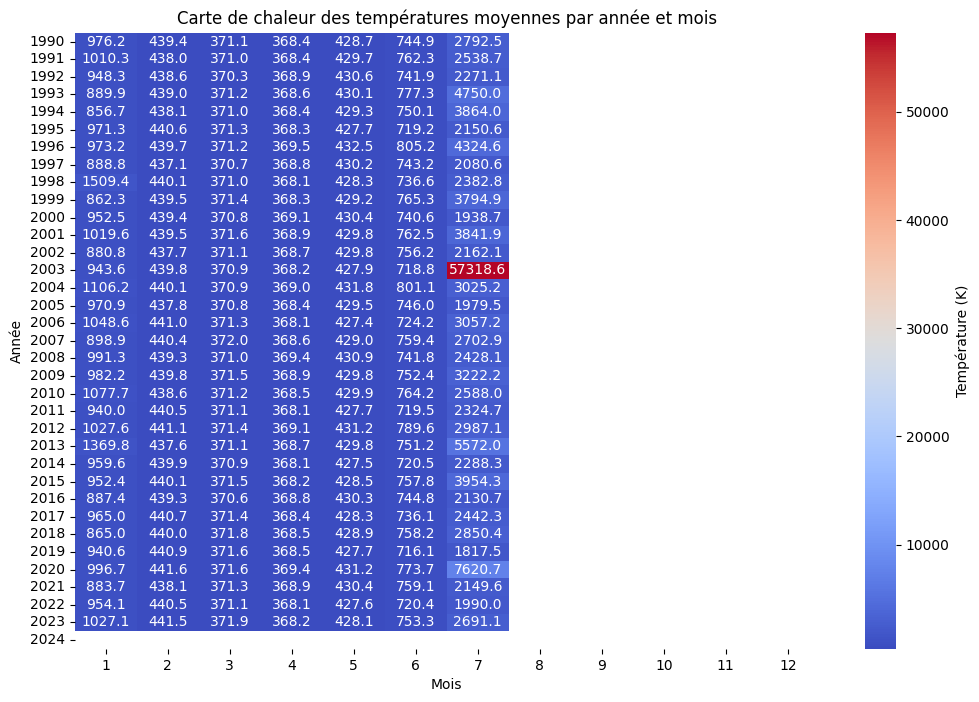

In [44]:
dff_distance = get_distance_data("1990-01-01", "2024-01-01")

# Ajouter les températures au DataFrame
dff_distance["Temperature_K"] = temperatures

# Extraire l'année et le mois
dff_distance["Year"] = dff_distance["Date"].dt.year
dff_distance["Month"] = dff_distance["Date"].dt.month

# Calcul des températures moyennes par année et mois
heatmap_data = dff_distance.groupby(["Year", "Month"])["Temperature_K"].mean().unstack()

# Création de la carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Température (K)'})
plt.title("Carte de chaleur des températures moyennes par année et mois")
plt.xlabel("Mois")
plt.ylabel("Année")
plt.show()

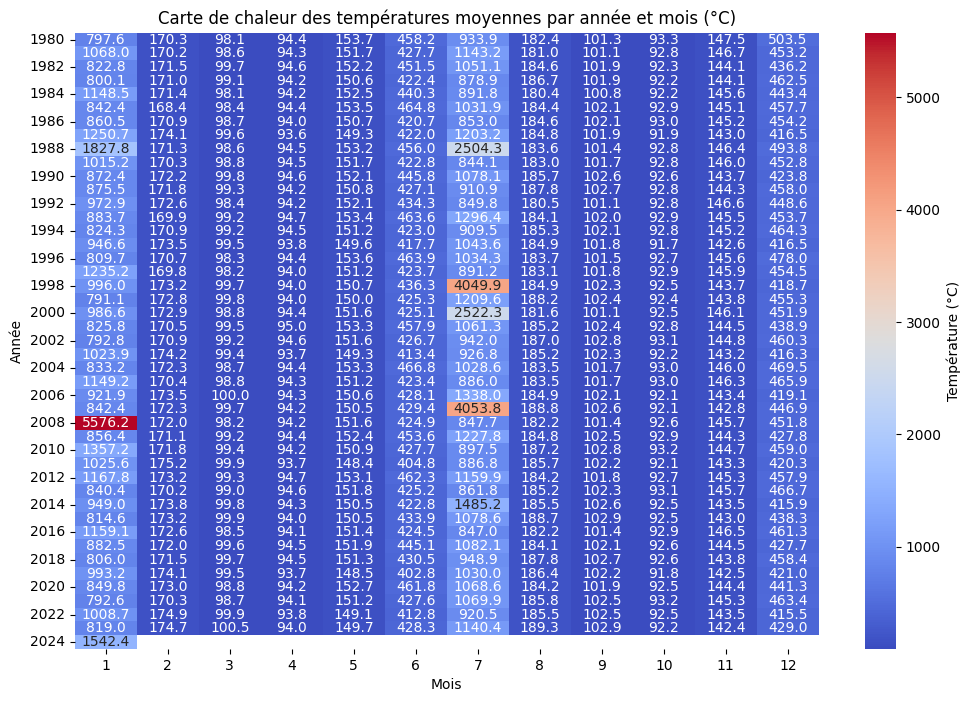

In [45]:


dff_distance = get_distance_data("1980-01-01", "2024-01-01")

# Recalculate temperatures using dff_distance
dff_distance["Distance_AU"] = dff_distance["Distance_km"] / 149_597_870.7
dff_distance["Temperature_K"] = dff_distance["Distance_AU"].apply(compute_temperature)

# Convert temperatures to degrees Celsius
dff_distance["Temperature_C"] = dff_distance["Temperature_K"] - 273.15

# Extract year and month
dff_distance["Year"] = dff_distance["Date"].dt.year
dff_distance["Month"] = dff_distance["Date"].dt.month

# Calculate average temperatures in Celsius by year and month
heatmap_data = dff_distance.groupby(["Year", "Month"])["Temperature_C"].mean().unstack()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Température (°C)'})
plt.title("Carte de chaleur des températures moyennes par année et mois (°C)")
plt.xlabel("Mois")
plt.ylabel("Année")
plt.show()